# Breast cancer dataset


In [589]:
import pandas as pd
from sklearn.model_selection import train_test_split# Load the dataset into a pandas DataFrame
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

## Breast cancer dataset-pipeline

In [495]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

# Create a pipeline for preprocessing the features
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('discretizer', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'))
])

# Preprocess the features using the pipeline
X_processed = preprocessor.fit_transform(X)

# Print the original and processed feature values for the first five rows
print("Original feature values:")
print(X)
print("\nProcessed feature values:")
print(X_processed)

Original feature values:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Processed feature values:
[[5. 0. 5. ... 9. 5. 4.]
 [6. 2. 6. ... 6. 2. 2.]
 [6. 3. 5. ... 8. 4. 2.]
 ...
 [4. 6. 4. ... 4. 1. 1.]
 [6. 6. 6. ... 9. 4. 4.]
 [0. 5. 0. ... 0. 2. 1.]]


## Breast cancer dataset - split into train and test

In [590]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Breast cancer dataset - Decision Tree

In [591]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree on the training set
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the accuracy score on the test set
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", round(acc,1))

Accuracy: 94.7


## Breast cancer dataset - chi squared test

In [592]:
import pandas as pd
from sklearn.model_selection import train_test_split# Load the dataset into a pandas DataFrame
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
print("feature names: ", breast_cancer_data.feature_names)
df = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = breast_cancer_data.target

# Create a Pandas dataframe from the data
#df = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)
#X, y = breast_cancer_data.data, breast_cancer_data.target

feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [593]:
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

In [594]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [595]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [596]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)

In [597]:
chi_scores

(array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
        1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
        2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
        2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
        1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
        4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
        3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
        1.29886140e+00, 2.31522407e-01]),
 array([8.01397628e-060, 3.32292194e-022, 0.00000000e+000, 0.00000000e+000,
        6.98631644e-001, 2.01012999e-002, 9.00175712e-006, 1.16563638e-003,
        6.11926026e-001, 9.93122221e-001, 3.89553429e-009, 9.21168192e-001,
        1.94877489e-056, 0.00000000e+000, 9.54425121e-001, 4.33366115e-001,
        3.06726812e-001, 5.80621137e-001, 9.92847410e-001, 9.36379753e-001,
        6.11324751e-109, 7.89668299e-040, 0.00000000e+000, 0.00000000e+000

In [598]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

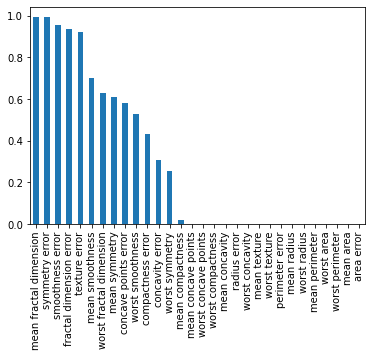

In [599]:
p_values.plot.bar()

In [600]:
print(p_values)

mean fractal dimension      9.931222e-01
symmetry error              9.928474e-01
smoothness error            9.544251e-01
fractal dimension error     9.363798e-01
texture error               9.211682e-01
mean smoothness             6.986316e-01
worst fractal dimension     6.303973e-01
mean symmetry               6.119260e-01
concave points error        5.806211e-01
worst smoothness            5.284529e-01
compactness error           4.333661e-01
concavity error             3.067268e-01
worst symmetry              2.544213e-01
mean compactness            2.010130e-02
mean concave points         1.165636e-03
worst concave points        2.404244e-04
worst compactness           1.108368e-05
mean concavity              9.001757e-06
radius error                3.895534e-09
worst concavity             3.252301e-10
mean texture                3.322922e-22
worst texture               7.896683e-40
perimeter error             1.948775e-56
mean radius                 8.013976e-60
worst radius    

remove the higher p-value features

In [602]:
df = df.drop(['mean fractal dimension','symmetry error','smoothness error','fractal dimension error','texture error'],axis=1)
df.head()

KeyError: "['mean fractal dimension' 'symmetry error' 'smoothness error'\n 'fractal dimension error' 'texture error'] not found in axis"

In [603]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a decision tree classifier on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set and compute accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy (largest diff): {round(accuracy_smallest,1)}%")

Accuracy (largest diff): 81.6%


We dropped five features, and with k-means clustering, we intend to drop the same number of features.

## Breast cancer dataset - K-means clustering part A

In [606]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load the dataset from scikit-learn
breast_cancer = load_breast_cancer()

# Convert the dataset into a pandas DataFrame
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Split the input features and target variable
X = data.iloc[:, :]
y = breast_cancer.target

# Get the feature names
feature_names = X.columns.tolist()
number_of_features = X.shape[1]
print("number_of_features: ",number_of_features)
for k in range(5, 26):
    print(f"\nK={k}")
    
    # Perform K-means clustering with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Compute the mean value of each feature for each cluster
    cluster_means = [np.mean(X[kmeans.labels_ == i], axis=0) for i in range(kmeans.n_clusters)]

    # Compute the absolute difference in means between clusters for each feature
    diff_means = np.abs(np.diff(cluster_means, axis=0))

    # Select the features with the largest difference in means between clusters
    selected_features = np.argsort(np.sum(diff_means, axis=0))[::-1][:k]
    
    # Select the features with the smallest difference in means between clusters
    selected_features_smallest = np.argsort(np.sum(diff_means, axis=0))[:k]

    # Filter the input data to keep only the selected features
    X_selected = X.iloc[:, selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100

    print(f"Number of features in the dataset: {number_of_features}")
    print(f"Number of features in the selected dataset (largest diff): {len(selected_features)}")
    print(f"Accuracy (largest diff): {round(accuracy,1)}%")
    
    # Filter the input data to keep only the selected features
    X_selected_smallest = X.iloc[:, selected_features_smallest]

    # Split the data into training and testing sets
    X_train_smallest, X_test_smallest, y_train_smallest, y_test_smallest = train_test_split(X_selected_smallest, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf_smallest = DecisionTreeClassifier(random_state=42)
    clf_smallest.fit(X_train_smallest, y_train_smallest)

    # Make predictions on the test set and compute accuracy
    y_pred_smallest = clf_smallest.predict(X_test_smallest)
    accuracy_smallest = accuracy_score(y_test_smallest, y_pred_smallest)*100

    print(f"Number of features in the selected dataset (smallest diff): {len(selected_features_smallest)}")
    print(f"Accuracy (largest diff): {round(accuracy_smallest,1)}%")
    



number_of_features:  30

K=5
Number of features in the dataset: 30
Number of features in the selected dataset (largest diff): 5
Accuracy (largest diff): 94.7%
Number of features in the selected dataset (smallest diff): 5
Accuracy (largest diff): 71.9%

K=6
Number of features in the dataset: 30
Number of features in the selected dataset (largest diff): 6
Accuracy (largest diff): 94.7%
Number of features in the selected dataset (smallest diff): 6
Accuracy (largest diff): 83.3%

K=7
Number of features in the dataset: 30
Number of features in the selected dataset (largest diff): 7
Accuracy (largest diff): 93.9%
Number of features in the selected dataset (smallest diff): 7
Accuracy (largest diff): 85.1%

K=8
Number of features in the dataset: 30
Number of features in the selected dataset (largest diff): 8
Accuracy (largest diff): 91.2%
Number of features in the selected dataset (smallest diff): 8
Accuracy (largest diff): 77.2%

K=9
Number of features in the dataset: 30
Number of features in

for 25 selected features the accuracy is 93.9%

## Breast cancer dataset - K-means clustering part B

In [607]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast cancer dataset
data = load_breast_cancer()

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column
print("number of columns: ", X.shape[1])

# Fit K-means clustering to the data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the variance of each feature within each cluster
variances = np.zeros((3, X.shape[1]))
for i in range(3):
    cluster_data = X[labels == i]
    variances[i] = np.var(cluster_data, axis=0)

# Select the features with the highest variance within the cluster with the most data points
most_common_cluster = np.argmax(np.bincount(labels))
for k in range(5, 27):
    selected_features = np.argsort(variances[most_common_cluster])[::-1][:k] # select top k features with highest variance
    # select the features with the lowest variance within the most common cluster
    low_selected_features = np.argsort(variances[most_common_cluster])[:k]  # select top k features with lowest variance
    # Use the selected features to transform the data
    X_selected = X.iloc[:, selected_features]
    low_X_selected = X.iloc[:, low_selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print("k = ",k,":")
    print(f"Accuracy for top {k} features with highest variance:", round(accuracy,1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(low_X_selected, y, test_size=0.2, random_state=42)
    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    # Make predictions on the test set and compute accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"Accuracy for top {k} features with lowest variance:", round(accuracy,1))


number of columns:  30
k =  5 :
Accuracy for top 5 features with highest variance: 93.0
Accuracy for top 5 features with lowest variance: 73.7
k =  6 :
Accuracy for top 6 features with highest variance: 93.0
Accuracy for top 6 features with lowest variance: 77.2
k =  7 :
Accuracy for top 7 features with highest variance: 93.0
Accuracy for top 7 features with lowest variance: 81.6
k =  8 :
Accuracy for top 8 features with highest variance: 93.9
Accuracy for top 8 features with lowest variance: 83.3
k =  9 :
Accuracy for top 9 features with highest variance: 93.0
Accuracy for top 9 features with lowest variance: 77.2
k =  10 :
Accuracy for top 10 features with highest variance: 93.9
Accuracy for top 10 features with lowest variance: 86.0
k =  11 :
Accuracy for top 11 features with highest variance: 93.0
Accuracy for top 11 features with lowest variance: 87.7
k =  12 :
Accuracy for top 12 features with highest variance: 93.0
Accuracy for top 12 features with lowest variance: 85.1
k =  13 

we receved: Accuracy for top 25 features with highest variance: 93%

# Iris dataset

## Iris dataset - load data

In [ ]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X=iris.data
y=iris.target
# Print the feature names and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

## Iris dataset - split into training and testing sets

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Iris dataset - chi squared test

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the iris dataset
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Define the features and target variable
X = iris.iloc[:, :-1] # Features
Y = iris.iloc[:, -1]  # Target variable

# Define a function to compute the chi-squared statistic and p-value
def chi_squared_test(X, Y):
    statistic = []
    p_value = []
    for col in X.columns:  # loop over all features
        observed = pd.crosstab(X[col], Y)
        stat, pval, dof, expected = chi2_contingency(observed)
        statistic.append(stat)
        p_value.append(pval)
    return pd.DataFrame({'Feature': X.columns, 'Chi-Squared Statistic': statistic, 'p-value': p_value})

# Call the function to compute the chi-squared statistic and p-value for each feature
results = chi_squared_test(X, Y)

# Print the results
print(results)

# Set the p-value threshold for significance
p_value_threshold = 0.1

# Print the significant features
print(results['p-value'])
significant_features = results[results['p-value'] < p_value_threshold]['Feature']
print("******************************")
print(significant_features)


## Iris dataset - chi squared test part B

In [ ]:
from scipy import stats
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
dtf = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dtf['target'] = iris.target

# Select categorical columns
categorical_columns = ['target']

# Perform chi-square test over all columns
chi_res = []
for i1, c1 in enumerate(categorical_columns):
    for i2, c2 in enumerate(dtf.columns[:-1]):
        try:
            contingency_table = pd.crosstab(dtf[c1], dtf[c2])
            c, p, _, _ = stats.chi2_contingency(contingency_table)
        except:
            c = None
            p = None
        chi_res.append({'col1': c1, 'col2': c2, 'score': c, 'p_val': p})

# Print the results
for res in chi_res:
    print(res)
chi_df= pd.DataFrame(chi_res)
chi_df.head()



In [ ]:
chi_df[chi_df.p_val>0.3].sort_values('p_val',ascending=False)

## Iris Dataset - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree on the training set
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the accuracy score on the test set
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


# diabetes dataset

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print("feature names: ", diabetes.feature_names)

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
print("data: ", diabetes.data)
print("target: ", diabetes.target)
# Create a pandas dataframe with feature data
df_features = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Create a pandas dataframe with target data and rename the column
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])

# Concatenate the feature and target dataframes horizontally
df = pd.concat([df_features, df_target], axis=1)

# Print the dataframe
print(df.head())
print("feature names: ", diabetes.feature_names)

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
print("data: ", diabetes.data)
print("target: ", diabetes.target)
# Create a pandas dataframe with feature data
df_features = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Create a pandas dataframe with target data and rename the column
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])

# Concatenate the feature and target dataframes horizontally
df = pd.concat([df_features, df_target], axis=1)

# Print the dataframe
print(df.head())
print("feature names: ", diabetes.feature_names)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset and split it into training and test sets
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,test_size=0.2, random_state=0)

# Initialize the decision tree regressor and fit it to the training data
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

# Evaluate the performance of the decision tree on the test set
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root mean squared error on test set: {rmse}")

# Evaluate the model on the test data and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Preprocess the data by scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a decision tree regression model on the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test data and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")


In [572]:
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names
number_of_features = X.shape[1]
print(number_of_features)

# Perform K-means clustering with K=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Compute the mean value of each feature for each cluster
cluster_means = [np.mean(X[kmeans.labels_ == i, :], axis=0) for i in range(kmeans.n_clusters)]

# Compute the absolute difference in means between clusters for each feature
diff_means = np.abs(np.diff(cluster_means, axis=0))

# Select the features with the largest difference in means between clusters
selected_features = np.argsort(np.sum(diff_means, axis=0))[::-1][:10]

# Filter the input data to keep only the selected features
X_selected = X[:, selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a decision tree classifier on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set and compute accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100

# Print the selected features
print(selected_features)
selected_feature_names = [feature_names[i] for i in selected_features]
print("number of features in the dataset: ",number_of_features)
print("number of features in the selected dataset: ",len(selected_feature_names))
print(f"Accuracy: {round(accuracy, 1)}%")

10
[4 7 5 8 9 2 6 3 0 1]
number of features in the dataset:  10
number of features in the selected dataset:  10
Accuracy: 0.0%


# Wine dataset

## Load data - wine dataset

In [301]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the dataset
wine = load_wine()
print("feature names: ", wine.feature_names)
# Create a Pandas dataframe from the data
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Add the target variable to the dataframe
df['target'] = wine.target

df.head()

feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [302]:
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

In [303]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [304]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## Decision tree - wine dataset

In [305]:
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

The "weighted" parameter is used to calculate the precision 
for each class and then average them based on their support (the number of samples in each class).

In [307]:
from sklearn import metrics
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# Calculate mean squared error using sklearn's mean_squared_error function
mse = metrics.mean_squared_error(y_test, y_pred)

In [573]:
print("Accuracy:",round(accuracy,1))
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Mean Squared Error:", mse)

Accuracy: 0.0
Precision: 0.6909283518073533
Recall: 0.6883116883116883
F1 score: 0.6895043731778426
Mean Squared Error: 0.3116883116883117


## chisquared test - wine dataset

In [309]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
chi_scores

In [311]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

Since ash has higher the p-value,
it says that this variables is independent of the repsone and can not be considered for model training.

In [314]:
df_drop_1 = df.drop('ash', axis=1)
df_drop_1.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [315]:
X = df_drop_1.iloc[:, :-1]  # Select all columns except the last one
y = df_drop_1.iloc[:, -1]   # Select the last column

In [316]:
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [318]:
#Evaluation using Accuracy score
from sklearn import metrics

# Calculate accuracy using sklearn's recall_score function
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')

# Calculate recall using sklearn's recall_score function
recall =metrics.recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score using sklearn's f1_score function
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# Calculate mean squared error using sklearn's mean_squared_error function
mse = metrics.mean_squared_error(y_test, y_pred)

In [319]:
print("Accuracy:",accuracy)
print("precision:",precision)
print("Recall: ",recall)
print("F1 score:", f1)
print("Mean Squared Error:", mse)

Accuracy: 0.9722222222222222
precision: 0.974074074074074
Recall:  0.9722222222222222
F1 score: 0.9717752234993614
Mean Squared Error: 0.027777777777777776


In [320]:
df_drop_2 = df_drop_1.drop('nonflavanoid_phenols', axis=1)
df_drop_2.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,127.0,2.80,3.06,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,2.76,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,3.24,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,3.49,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,2.69,1.82,4.32,1.04,2.93,735.0,0


In [321]:
X = df_drop_2.iloc[:, :-1]  # Select all columns except the last one
y = df_drop_2.iloc[:, -1]   # Select the last column
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [323]:
#Evaluation using Accuracy score
from sklearn import metrics

# Calculate accuracy using sklearn's recall_score function
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')

# Calculate recall using sklearn's recall_score function
recall =metrics.recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score using sklearn's f1_score function
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# Calculate mean squared error using sklearn's mean_squared_error function
mse = metrics.mean_squared_error(y_test, y_pred)

In [324]:
print("Accuracy:",accuracy)
print("precision:",precision)
print("Recall: ",recall)
print("F1 score:", f1)
print("Mean Squared Error:", mse)

Accuracy: 0.9722222222222222
precision: 0.974074074074074
Recall:  0.9722222222222222
F1 score: 0.9717752234993614
Mean Squared Error: 0.1111111111111111


## K-means featrue selection

This code performs K-means clustering with different values of K and then selects the features with the largest and smallest differences in means between the clusters. It then trains a decision tree classifier on the selected features and computes the accuracy of the classifier on a test set.

By comparing the accuracies obtained using the features with the largest and smallest differences in means between the clusters, this code helps to test the effectiveness of the K-means feature selection method.

In [583]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_wine

# Load the dataset from scikit-learn
wine = load_wine()

# Convert the dataset into a pandas DataFrame
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Split the input features and target variable
X = data.iloc[:, :]
y = wine.target

# Get the feature names
feature_names = X.columns.tolist()
number_of_features = X.shape[1]
print("number_of_features: ",number_of_features)

for k in range(5, 12):
    print(f"\nK={k}")
    
    # Perform K-means clustering with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Compute the mean value of each feature for each cluster
    cluster_means = [np.mean(X[kmeans.labels_ == i], axis=0) for i in range(kmeans.n_clusters)]

    # Compute the absolute difference in means between clusters for each feature
    diff_means = np.abs(np.diff(cluster_means, axis=0))

    # Select the features with the largest difference in means between clusters
    selected_features = np.argsort(np.sum(diff_means, axis=0))[::-1][:k]
    
    # Select the features with the smallest difference in means between clusters
    selected_features_smallest = np.argsort(np.sum(diff_means, axis=0))[:k]

    # Filter the input data to keep only the selected features
    X_selected = X.iloc[:, selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100

    print(f"Number of features in the dataset: {number_of_features}")
    print(f"Number of features in the selected dataset (largest diff): {len(selected_features)}")
    print(f"Accuracy (largest diff): {round(accuracy,1)}%")
    
    # Filter the input data to keep only the selected features
    X_selected_smallest = X.iloc[:, selected_features_smallest]

    # Split the data into training and testing sets
    X_train_smallest, X_test_smallest, y_train_smallest, y_test_smallest = train_test_split(X_selected_smallest, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf_smallest = DecisionTreeClassifier(random_state=42)
    clf_smallest.fit(X_train_smallest, y_train_smallest)

    # Make predictions on the test set and compute accuracy
    y_pred_smallest = clf_smallest.predict(X_test_smallest)
    accuracy_smallest = accuracy_score(y_test_smallest, y_pred_smallest)*100

    print(f"Number of features in the selected dataset (smallest diff): {len(selected_features_smallest)}")
    print(f"Accuracy (smallest diff): {round(accuracy_smallest,1)}%")


number_of_features:  13

K=5
Number of features in the dataset: 13
Number of features in the selected dataset (largest diff): 5
Accuracy (largest diff): 97.2%
Number of features in the selected dataset (smallest diff): 5
Accuracy (smallest diff): 77.8%

K=6
Number of features in the dataset: 13
Number of features in the selected dataset (largest diff): 6
Accuracy (largest diff): 97.2%
Number of features in the selected dataset (smallest diff): 6
Accuracy (smallest diff): 75.0%

K=7
Number of features in the dataset: 13
Number of features in the selected dataset (largest diff): 7
Accuracy (largest diff): 97.2%
Number of features in the selected dataset (smallest diff): 7
Accuracy (smallest diff): 77.8%

K=8
Number of features in the dataset: 13
Number of features in the selected dataset (largest diff): 8
Accuracy (largest diff): 97.2%
Number of features in the selected dataset (smallest diff): 8
Accuracy (smallest diff): 88.9%

K=9
Number of features in the dataset: 13
Number of feature

In [565]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Load the wine dataset from scikit-learn
wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
number_of_features = X.shape[1]
print("number of features in the dataset: ",number_of_features)

# Fit K-means clustering to the data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the variance of each feature within each cluster
variances = np.zeros((3, X.shape[1]))
for i in range(3):
    cluster_data = X[labels == i]
    variances[i] = np.var(cluster_data, axis=0)

# Select the features with the highest variance within the cluster with the most data points
most_common_cluster = np.argmax(np.bincount(labels))

for k in range(5, number_of_features+1):
    # select the top k features with highest variance
    selected_features = np.argsort(variances[most_common_cluster])[::-1][:k]
    # select the top k features with lowest variance
    low_selected_features = np.argsort(variances[most_common_cluster])[:k]

    # Use the selected features to transform the data
    X_selected = X.iloc[:, selected_features]
    low_X_selected = X.iloc[:, low_selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy for top k features with highest variance
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print("k = ",k,":")
    print(f"Top {k} features with highest variance Accuracy:", round(accuracy,1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(low_X_selected, y, test_size=0.2, random_state=42)
    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    # Make predictions on the test set and compute accuracy for top k features with lowest variance
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"Top {k} features with lowest variance Accuracy:", round(accuracy,1))


number of features in the dataset:  13
k =  5 :
Top 5 features with highest variance Accuracy: 86.1
Top 5 features with lowest variance Accuracy: 83.3
k =  6 :
Top 6 features with highest variance Accuracy: 94.4
Top 6 features with lowest variance Accuracy: 91.7
k =  7 :
Top 7 features with highest variance Accuracy: 94.4
Top 7 features with lowest variance Accuracy: 88.9
k =  8 :
Top 8 features with highest variance Accuracy: 97.2
Top 8 features with lowest variance Accuracy: 86.1
k =  9 :
Top 9 features with highest variance Accuracy: 94.4
Top 9 features with lowest variance Accuracy: 86.1
k =  10 :
Top 10 features with highest variance Accuracy: 97.2
Top 10 features with lowest variance Accuracy: 94.4
k =  11 :
Top 11 features with highest variance Accuracy: 94.4
Top 11 features with lowest variance Accuracy: 94.4
k =  12 :
Top 12 features with highest variance Accuracy: 94.4
Top 12 features with lowest variance Accuracy: 94.4
k =  13 :
Top 13 features with highest variance Accuracy

# diabetes dataset

## load data - diabetes dataset

In [541]:
#import pandas library
import pandas as pd

#loading dataset
df = pd.read_csv("C:\\Users\\linor\\Desktop\\project\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [543]:
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

In [544]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [545]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## chisquared test - diabetes_dataset

In [546]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)

In [547]:
chi_scores

(array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
        2175.56527292,  127.66934333,    5.39268155,  181.30368904]),
 array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
        0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041]))

In [548]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

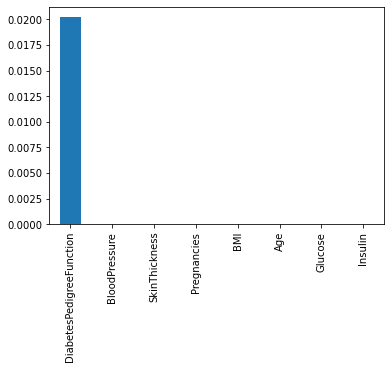

In [549]:
p_values.plot.bar()

In [550]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


Since DiabetesPedigreeFunction has higher the p-value,
it says that this variables is independent of the repsone and can not be considered for model training

In [551]:
df_drop_1 = df.drop('DiabetesPedigreeFunction', axis=1)
df_drop_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [556]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_drop_1.iloc[:, :-1]  # Select all columns except the last one
y = df_drop_1.iloc[:, -1]   # Select the last column

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)*100

# Calculate precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')

# Calculate recall using sklearn's recall_score function
recall =metrics.recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score using sklearn's f1_score function
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# Calculate mean squared error using sklearn's mean_squared_error function
mse = metrics.mean_squared_error(y_test, y_pred)
print("Accuracy:",round(accuracy,1))
print("precision:",round(precision,1))
print("Recall: ",round(recall,1))


Accuracy: 68.8
precision: 0.7
Recall:  0.7


In [577]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset from a CSV file
data = pd.read_csv("C:\\Users\\linor\\Desktop\\project\\diabetes.csv")

# Split the input features and target variable
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

# Get the feature names
feature_names = X.columns.tolist()
number_of_features = X.shape[1]

# Perform K-means clustering with K=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Compute the mean value of each feature for each cluster
cluster_means = [np.mean(X[kmeans.labels_ == i], axis=0) for i in range(kmeans.n_clusters)]

# Compute the absolute difference in means between clusters for each feature
diff_means = np.abs(np.diff(cluster_means, axis=0))

# Select the features with the largest difference in means between clusters
selected_features = np.argsort(np.sum(diff_means, axis=0))[::-1][:5]

# Filter the input data to keep only the selected features
X_selected = X.iloc[:, selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a decision tree classifier on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set and compute accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100

print(f"Number of features in the dataset: {number_of_features}")
print(f"Number of features in the selected dataset: {len(selected_features)}")
print(f"Accuracy: {round(accuracy,1)}%")


Number of features in the dataset: 8
Number of features in the selected dataset: 5
Accuracy: 63.6%


In [580]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset from a CSV file
data = pd.read_csv("C:\\Users\\linor\\Desktop\\project\\diabetes.csv")

# Split the input features and target variable
X = data.iloc[:, :-1]  # Select all columns except the last one
y = data.iloc[:, -1]   # Select the last column

# Get the feature names
feature_names = X.columns.tolist()
number_of_features = X.shape[1]

for k in range(5, 8):
    print(f"\nK={k}")
    
    # Perform K-means clustering with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Compute the mean value of each feature for each cluster
    cluster_means = [np.mean(X[kmeans.labels_ == i], axis=0) for i in range(kmeans.n_clusters)]

    # Compute the absolute difference in means between clusters for each feature
    diff_means = np.abs(np.diff(cluster_means, axis=0))

    # Select the features with the largest difference in means between clusters
    selected_features = np.argsort(np.sum(diff_means, axis=0))[::-1][:k]
    
    # Select the features with the smallest difference in means between clusters
    selected_features_smallest = np.argsort(np.sum(diff_means, axis=0))[::-1][-k:]

    # Filter the input data to keep only the selected features
    X_selected = X.iloc[:, selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100

    print(f"Number of features in the dataset: {number_of_features}")
    print(f"Number of features in the selected dataset: {len(selected_features)}")
    print(f"Accuracy: {round(accuracy,1)}%")
    
    # Filter the input data to keep only the selected features
    X_selected_smallest = X.iloc[:, selected_features_smallest]

    # Split the data into training and testing sets
    X_train_smallest, X_test_smallest, y_train_smallest, y_test_smallest = train_test_split(X_selected_smallest, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf_smallest = DecisionTreeClassifier(random_state=42)
    clf_smallest.fit(X_train_smallest, y_train_smallest)

    # Make predictions on the test set and compute accuracy
    y_pred_smallest = clf_smallest.predict(X_test_smallest)
    accuracy_smallest = accuracy_score(y_test_smallest, y_pred_smallest)*100

    print(f"Number of features in the selected dataset (smallest diff): {len(selected_features_smallest)}")
    print(f"Accuracy (smallest diff): {round(accuracy_smallest,1)}%")



K=5
Number of features in the dataset: 8
Number of features in the selected dataset: 5
Accuracy: 64.3%
Number of features in the selected dataset (smallest diff): 5
Accuracy (smallest diff): 58.4%

K=6
Number of features in the dataset: 8
Number of features in the selected dataset: 6
Accuracy: 66.9%
Number of features in the selected dataset (smallest diff): 6
Accuracy (smallest diff): 55.8%

K=7
Number of features in the dataset: 8
Number of features in the selected dataset: 7
Accuracy: 67.5%
Number of features in the selected dataset (smallest diff): 7
Accuracy (smallest diff): 72.1%


## feature selection by clustering - diabetes_dataset

In [566]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the data from a CSV file into a pandas DataFrame
df = pd.read_csv("C:\\Users\\linor\\Desktop\\project\\diabetes.csv")

X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column
print("number of features in the dataset: ", X.shape[1])
# Fit K-means clustering to the data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the variance of each feature within each cluster
variances = np.zeros((3, X.shape[1]))
for i in range(3):
    cluster_data = X[labels == i]
    variances[i] = np.var(cluster_data, axis=0)
    #print(cluster_data)

# Select the features with the highest variance within the cluster with the most data points
most_common_cluster = np.argmax(np.bincount(labels))
selected_features = np.argsort(variances[most_common_cluster])[::-1] # select features with highest variance
low_selected_features = np.argsort(variances[most_common_cluster])  # select features with lowest variance

# Loop over k values and print the accuracy for each
for k in range(4, 9):
    # Select the top k features with highest variance
    selected_k_features = selected_features[:k]
    X_selected_k = X.iloc[:, selected_k_features]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected_k, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = clf.predict(X_test)
    accuracy_high_var = accuracy_score(y_test, y_pred)*100

    # Select the top k features with lowest variance
    low_selected_k_features = low_selected_features[:k]
    X_low_selected_k = X.iloc[:, low_selected_k_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_low_selected_k, y, test_size=0.2, random_state=42)

    # Train a decision tree classifier on the training set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = clf.predict(X_test)
    accuracy_low_var = accuracy_score(y_test, y_pred)*100

    # Print the accuracy for the current k value
    print("k = ",k,":")
    print(f"Accuracy with top {k} features with highest variance: {round(accuracy_high_var, 1)}")
    print(f"Accuracy with top {k} features with lowest variance: {round(accuracy_low_var, 1)}")
    


number of features in the dataset:  8
k =  4 :
Accuracy with top 4 features with highest variance: 63.6
Accuracy with top 4 features with lowest variance: 58.4
k =  5 :
Accuracy with top 5 features with highest variance: 64.9
Accuracy with top 5 features with lowest variance: 58.4
k =  6 :
Accuracy with top 6 features with highest variance: 67.5
Accuracy with top 6 features with lowest variance: 57.8
k =  7 :
Accuracy with top 7 features with highest variance: 67.5
Accuracy with top 7 features with lowest variance: 64.3
k =  8 :
Accuracy with top 8 features with highest variance: 75.3
Accuracy with top 8 features with lowest variance: 76.6
